# $\textbf{PROGRAMMING ASSIGNMENT}$
# $\textbf{Lecture 5: Logistic Regression}$

1. Perform EDA (Visualization Tasks)
2. Training-Testing Split and Scaling
3. Logistic Regression Model
4. Model Performance Evaluation

---

Data: [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc

In [2]:
heart_disease = fetch_ucirepo(id=45)
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


### $\textbf{EDA}$

In [3]:
df = pd.merge(heart_disease.data.features, heart_disease.data.targets, right_index=True, left_index=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


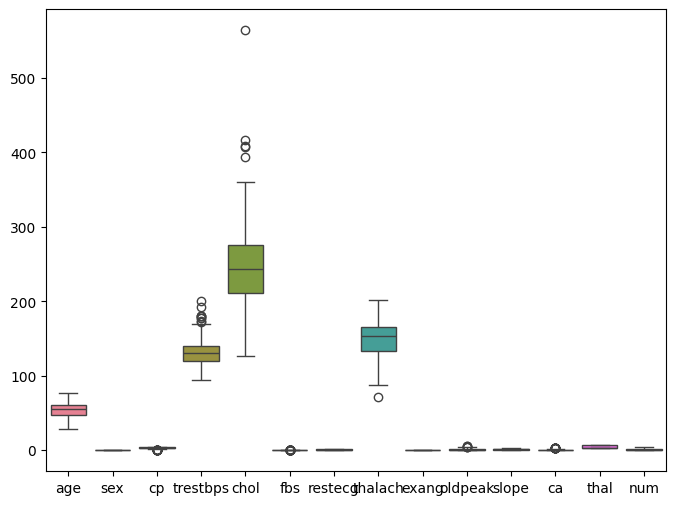

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.show()

### $\textbf{Visualization Tasks}$

**TASK: Create a bar plot that shows the total counts per target value.**

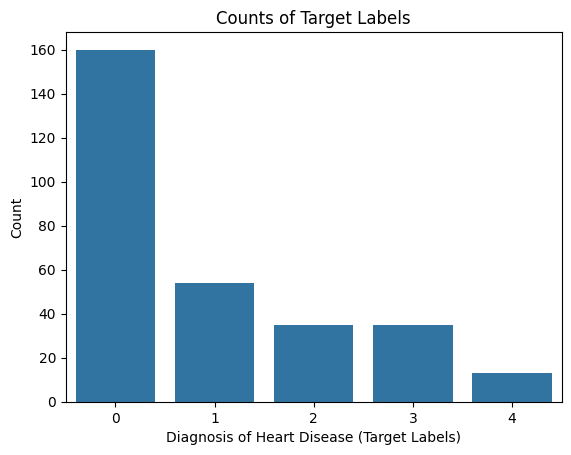

In [9]:
plt.title("Counts of Target Labels")
plt.xlabel("Diagnosis of Heart Disease (Target Labels)")
plt.ylabel("Count")
sns.countplot(x="num", data=df)
plt.show()

**TASK: Create a pairplot that displays the relationships between the following columns:**

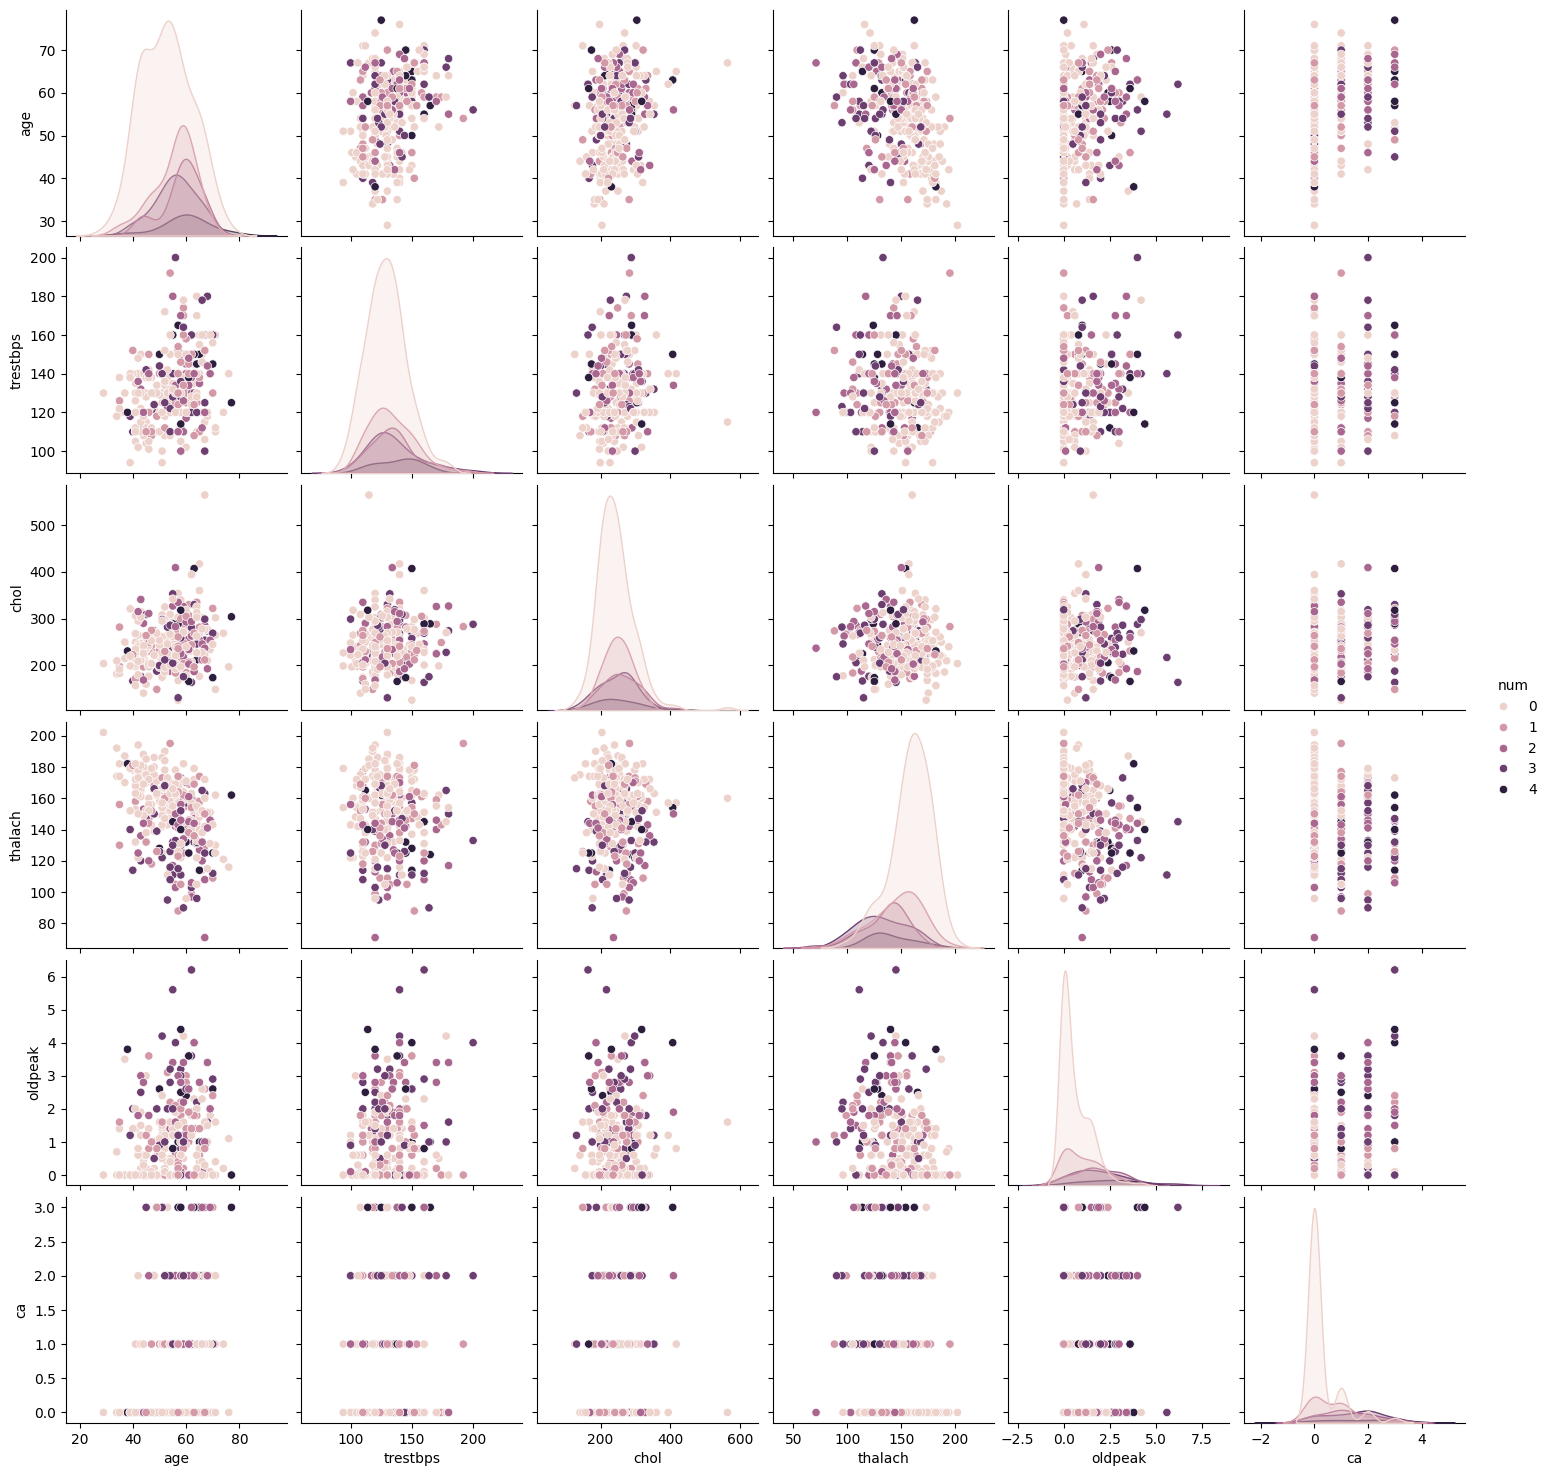

In [10]:
# Problem had the columns cut-off, thus I'll only present the pairplots of numerical columns
numericals = heart_disease.variables[heart_disease.variables["type"] == "Integer"]["name"]
sns.pairplot(df[numericals], hue="num")
plt.show()

**TASK: Create a heatmap that displays the correlation between all the columns.**

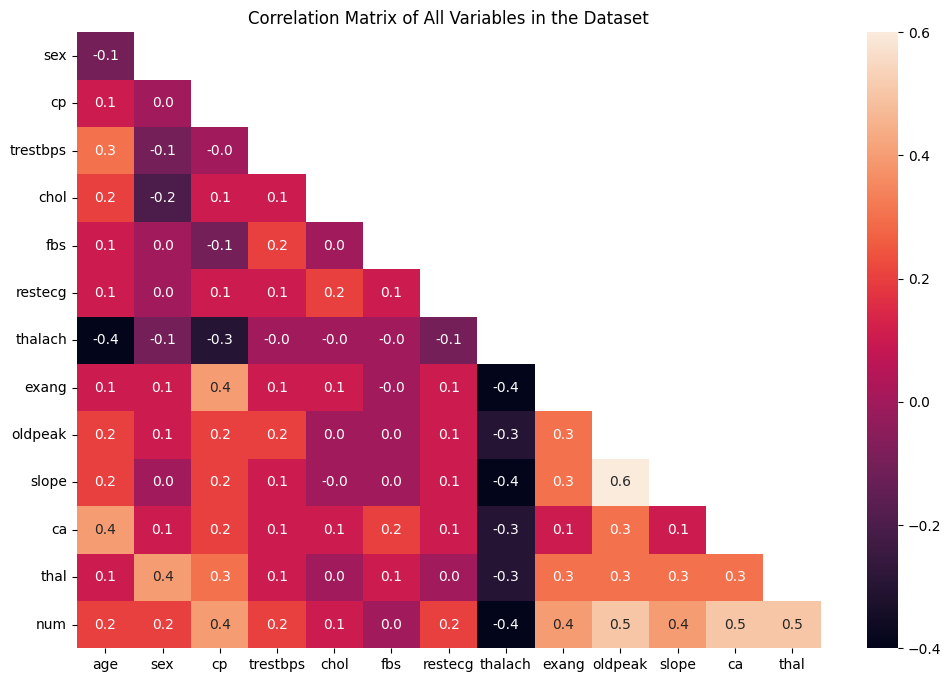

In [39]:
corr = df.corr().round(1)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

viz = corr.mask(mask).dropna(how='all').dropna(how='all', axis=1)

plt.figure(figsize=(12, 8))
plt.title("Correlation Matrix of All Variables in the Dataset")
sns.heatmap(viz, annot=True, fmt='.1f')
plt.show()

### $\textbf{Training-Testing Split and Scaling}$

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [12]:
X = df.drop(columns=["num"])
y = df["num"]

In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [14]:
y.value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [16]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
227,67,0,3,152,277,0,0,172,0,0.0,1,1.0,3.0
270,61,1,4,140,207,0,2,138,1,1.9,1,1.0,7.0
253,51,0,3,120,295,0,2,157,0,0.6,1,0.0,3.0
251,58,1,4,146,218,0,0,105,0,2.0,2,1.0,7.0
137,62,1,2,120,281,0,2,103,0,1.4,2,1.0,7.0


In [17]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
112,52,1,1,118,186,0,2,190,0,0.0,2,0.0,6.0
151,42,0,4,102,265,0,2,122,0,0.6,2,0.0,3.0
12,56,1,3,130,256,1,2,142,1,0.6,2,1.0,6.0
219,59,1,4,138,271,0,2,182,0,0.0,1,0.0,3.0
140,59,1,2,140,221,0,0,164,1,0.0,1,0.0,3.0


In [18]:
y_train.value_counts()

num
0    152
1     50
3     35
2     33
4     12
Name: count, dtype: int64

In [19]:
y_test.value_counts()

num
0    8
1    4
2    2
4    1
Name: count, dtype: int64

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

### $\textbf{Logistic Regression Model}$

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [21]:
# Solver -> Saga, this is to handle multionomial loss, and work with multinomial data, and it also guarantees fast convergence

log_model = LogisticRegression(solver="saga", multi_class="multinomial", max_iter=5000, random_state=0)

In [22]:
# use logarithmically spaced values for faster convergence, and 'regularization' of params
C = np.logspace(0, 8, 20)
penalties = ["l1", "l2"]

grid_model = GridSearchCV(log_model, param_grid={ 'C': C, 'penalty': penalties }, cv=5, scoring="neg_mean_squared_error")
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000,
                                          multi_class='multinomial',
                                          random_state=0, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.63665090e+00, 6.95192796e+00, 1.83298071e+01,
       4.83293024e+01, 1.27427499e+02, 3.35981829e+02, 8.85866790e+02,
       2.33572147e+03, 6.15848211e+03, 1.62377674e+04, 4.28133240e+04,
       1.12883789e+05, 2.97635144e+05, 7.84759970e+05, 2.06913808e+06,
       5.45559478e+06, 1.43844989e+07, 3.79269019e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']},
             scoring='neg_mean_squared_error')

**TASK: Report back your search's optimal parameters, specifically the C value.** 

In [23]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

**TASK: Report back the model's coefficients.**

In [24]:
best_log_model = grid_model.best_estimator_
best_log_model.coef_

array([[ 0.        , -0.48299776, -0.74497162, -0.43467417, -0.09078709,
         0.03792223, -0.21831333,  0.41536568, -0.32534488, -0.49436936,
        -0.25850266, -1.0851495 , -0.7279644 ],
       [-0.00981456,  0.06199682, -0.29077906,  0.03554138,  0.07266396,
        -0.47040364,  0.        ,  0.        ,  0.02672797, -0.44304887,
        -0.04581251, -0.29410344, -0.21332796],
       [ 0.04846275,  0.        ,  0.21952597,  0.        ,  0.26630056,
         0.        , -0.2478734 , -0.20995517,  0.        ,  0.0346337 ,
         0.        ,  0.        ,  0.        ],
       [-0.31573576, -0.07442731,  0.        ,  0.        , -0.02470591,
         0.        ,  0.16003134, -0.34130492,  0.09395322,  0.        ,
         0.17389422,  0.33579576,  0.23127825],
       [ 0.48866023,  0.28239714,  0.52962604,  0.18722075,  0.        ,
        -0.35004959,  0.60009011,  0.        , -0.26112752,  0.        ,
         0.36382746,  0.38754735,  0.12841965]])

In [25]:
coef_df = pd.DataFrame(best_log_model.coef_.T, index=X.columns, columns=sorted(y.unique()))
coef_df

,0,1,2,3,4
age,0.000000,-0.009815,0.048463,-0.315736,0.488660
sex,-0.482998,0.061997,0.000000,-0.074427,0.282397
cp,-0.744972,-0.290779,0.219526,0.000000,0.529626
trestbps,-0.434674,0.035541,0.000000,0.000000,0.187221
chol,-0.090787,0.072664,0.266301,-0.024706,0.000000
fbs,0.037922,-0.470404,0.000000,0.000000,-0.350050
restecg,-0.218313,0.000000,-0.247873,0.160031,0.600090
thalach,0.415366,0.000000,-0.209955,-0.341305,0.000000
exang,-0.325345,0.026728,0.000000,0.093953,-0.261128
oldpeak,-0.494369,-0.443049,0.034634,0.000000,0.000000


In [26]:
best_log_model.intercept_

array([ 1.74082709,  0.97331395, -0.07922894, -0.38005477, -2.25485732])

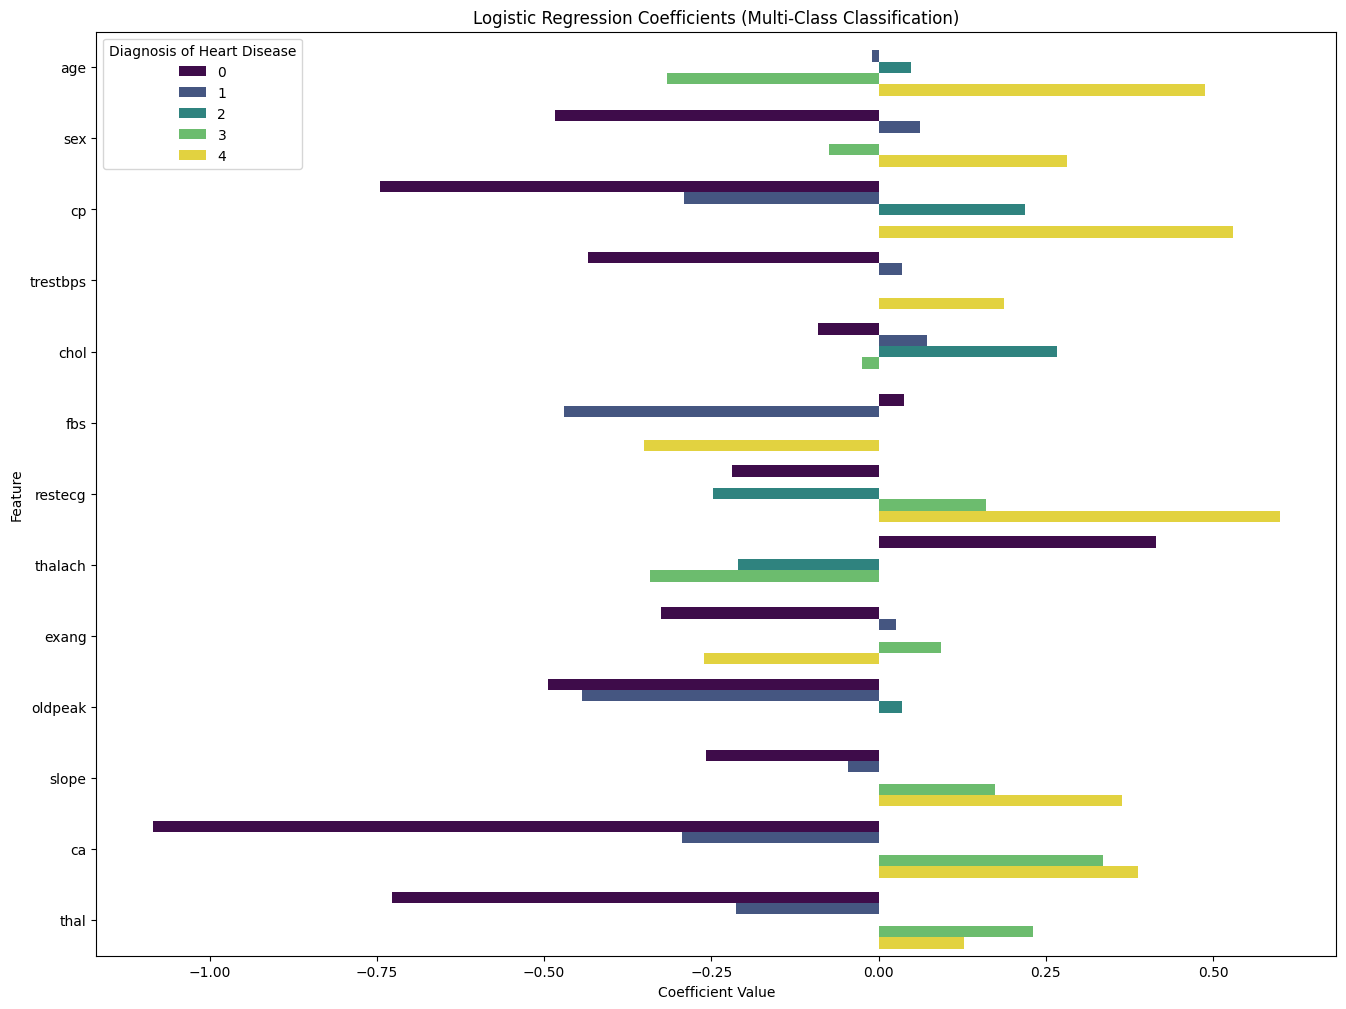

In [27]:
coef_melted = coef_df.reset_index().melt(id_vars='index', var_name='Diagnosis', value_name='Coefficient')
coef_melted.rename(columns={'index': 'Feature'}, inplace=True)

plt.figure(figsize=(16, 12))
sns.barplot(x='Coefficient', y='Feature', hue='Diagnosis', data=coef_melted, palette='viridis')
plt.title('Logistic Regression Coefficients (Multi-Class Classification)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend(title='Diagnosis of Heart Disease')
plt.show()

### $\textbf{Model Performance Evaluation}$

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

In [28]:
y_pred = grid_model.predict(scaled_X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.6

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [30]:
confusion_matrix(y_test, y_pred)

array([[7, 1, 0, 0, 0],
       [2, 2, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

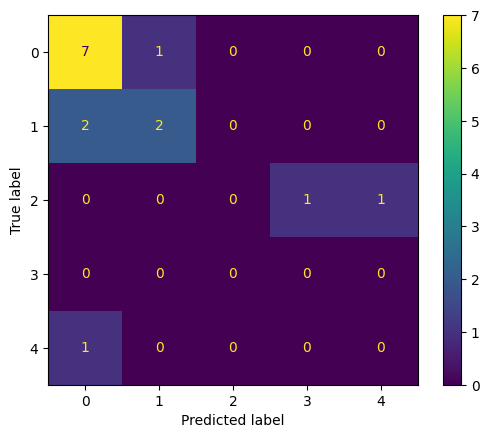

In [31]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test)

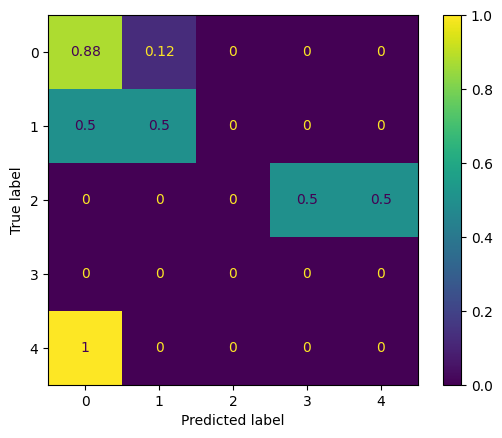

In [32]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test, normalize='true')

In [33]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

    accuracy                           0.60        15
   macro avg       0.27      0.28      0.27        15
weighted avg       0.55      0.60      0.57        15



### $\textbf{Performance Curves}$

**TASK: Create both the precision recall curve and the ROC Curve.**

In [34]:
# Because we are only using 5% of the dataset for testing, dummies may not have all labels
# We then have to manually fill those missing labels with False when getting the dummies
labels = y.unique()
y_dummies = pd.get_dummies(y_test, drop_first=False)

missing_labels = set(labels) - set(y_dummies.columns)
for label in missing_labels:
    y_dummies[label] = False

y_test_dummies = y_dummies[sorted(labels)].values

In [35]:
y_score = grid_model.decision_function(scaled_X_test)

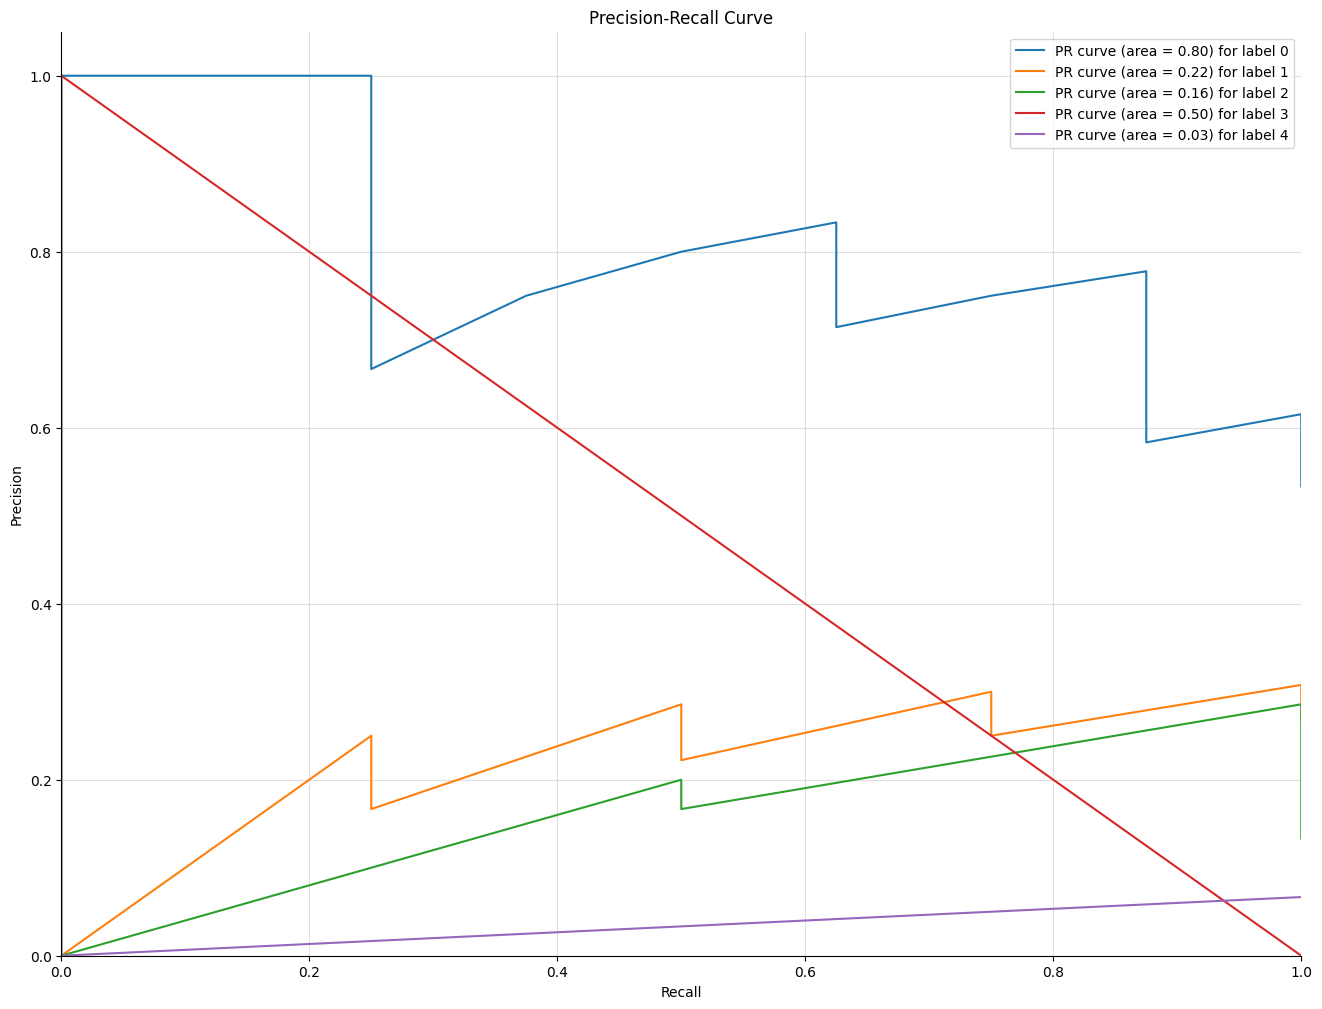

In [36]:
precision = {}
recall = {}
pr_auc = {}

for i in labels:
    precision[i], recall[i], _ = precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

fig, ax = plt.subplots(figsize=(16, 12))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')

for i in range(len(labels)):
    ax.plot(recall[i], precision[i], label=f'PR curve (area = {pr_auc[i]:.2f}) for label {i}')

ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

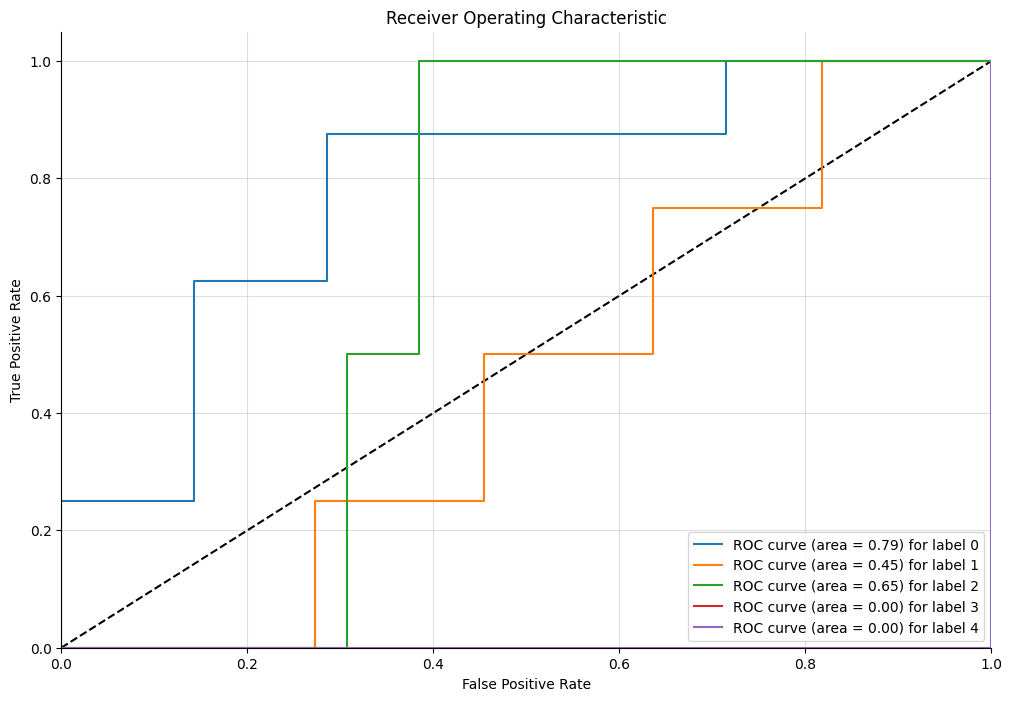

In [37]:
fpr = {}
tpr = {}
roc_auc = {}

for i in labels:
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, ax = plt.subplots(figsize=(12,8))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')

for i in range(len(labels)):
    ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i] if not np.isnan(roc_auc[i]) else 0:.2f}) for label {i}')

ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()